In [1]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Input, Add, Reshape,Conv2D,MaxPooling2D,ZeroPadding2D,experimental,AveragePooling2D,Concatenate,Dropout,Activation
from matplotlib import pyplot as plt
from tensorflow.keras.models import Model
import numpy as np
import keras
from keras import layers
from PIL import Image
import cv2

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [4]:
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [3]:
mean = []
for i in range(10):
  pos = np.where(y_train == i)
  mean.append((np.sum(x_train[pos],axis = 0))/pos[0].shape[0])

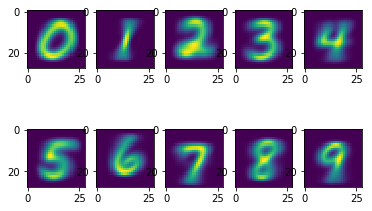

In [5]:
_, axs = plt.subplots(2,5)
axs = axs.flatten()
for i, ax in enumerate(axs):
  ax.imshow(mean[i])
plt.show()# 

In [6]:
mean = np.array(mean)
mean = mean.astype(np.float32)
x_train = x_train.astype(np.float32)

In [7]:
y_train_ccoeff = []
for img in x_train:
    ccoeff = []
    for i in range(10):
        ccoeff.append(cv2.matchTemplate(mean[i],img,cv2.TM_CCOEFF_NORMED))
    y_train_ccoeff.append(ccoeff)

In [8]:
y_train_ccoeff = np.array(y_train_ccoeff)

In [10]:
y_train_ccoeff = np.squeeze(y_train_ccoeff,axis = -1)

In [11]:
y_train_ccoeff.shape

(60000, 10)

In [12]:
input = Input((28,28,1))
inputB = Input((10))
c1l1  = Conv2D(32,3,(1,1),padding = 'same',activation='relu')(input)
c1l2  = Conv2D(32,3,(1,1),padding = 'same',activation='relu')(c1l1)
ces2  = Add()([c1l2, c1l1])
c1l3  = Conv2D(32,3,(1,1),padding = 'same',activation='relu')(ces2)
ces3  = Add()([c1l3, ces2])
ces3  = Flatten()(ces3)
ces3  = Dense(10)(ces3)
ces3  = Add()([ces3,inputB])
ces3  = Activation('softmax')(ces3)
model = Model(inputs=[input, inputB], outputs=ces3)

In [15]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
checkpoint_filepath = 'Coeff'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath,monitor='val_accuracy',mode='max',
                                                               save_best_only=True)
history2 = model.fit(x = [x_train,y_train_ccoeff],y = y_train,epochs = 50,callbacks = [model_checkpoint_callback],
                     validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/50
53984/54000 [============================>.] - ETA: 0s - loss: 2.8388 - accuracy: 0.9251

W0907 00:22:52.290162   592 deprecation.py:506] From C:\Users\DeLL\Anaconda3\lib\site-packages\tensorflow_core\python\ops\resource_variable_ops.py:1781: calling BaseResourceVariable.__init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


54000/54000 [==============================] - 213s 4ms/sample - loss: 2.8379 - accuracy: 0.9251 - val_loss: 0.1144 - val_accuracy: 0.9710
Epoch 2/50
54000/54000 [==============================] - 234s 4ms/sample - loss: 0.0961 - accuracy: 0.9746 - val_loss: 0.1483 - val_accuracy: 0.9683
Epoch 3/50
54000/54000 [==============================] - 220s 4ms/sample - loss: 0.0736 - accuracy: 0.9797 - val_loss: 0.1316 - val_accuracy: 0.9725
Epoch 4/50
54000/54000 [==============================] - 221s 4ms/sample - loss: 0.0746 - accuracy: 0.9789 - val_loss: 0.1207 - val_accuracy: 0.9785
Epoch 5/50
54000/54000 [==============================] - 214s 4ms/sample - loss: 0.0604 - accuracy: 0.9833 - val_loss: 0.1274 - val_accuracy: 0.9762
Epoch 6/50
54000/54000 [==============================] - 208s 4ms/sample - loss: 0.0549 - accuracy: 0.9860 - val_loss: 0.1226 - val_accuracy: 0.9785
Epoch 7/50
54000/54000 [==============================] - 209s 4ms/sample - loss: 0.0524 - accuracy: 0.9873 - v

In [19]:
model = tf.keras.models.load_model('Coeff')

In [20]:
y_test_ccoeff = []
for img in x_test.astype(np.float32):
    ccoeff = []
    for i in range(10):
        ccoeff.append(cv2.matchTemplate(mean[i],img,cv2.TM_CCOEFF_NORMED))
    y_test_ccoeff.append(ccoeff)

In [21]:
y_test_ccoeff = np.array(y_test_ccoeff)

In [23]:
y_test_ccoeff = np.squeeze(y_test_ccoeff,axis = -1)

In [25]:
x_test = np.expand_dims(x_test,axis = -1)

In [26]:
#x_test = np.expand_dims(x_test,axis = -1)
model.evaluate([x_test,y_test_ccoeff],y_test, verbose = 2)

10000/1 - 8s - loss: 0.1281 - accuracy: 0.9824


[0.2561554617920786, 0.9824]

In [14]:
x_train=  np.expand_dims(x_train,axis = -1)

In [162]:
preds = np.argmax(y_test_ccoeff,axis = -1)

In [163]:
pred = 0
for y1,y2 in zip(y_test,preds):
    if (y1 == y2):
        pred = pred + 1

In [164]:
pred

8208

In [18]:
cd knowledgevision


C:\Users\DeLL\desktop\knowledgevision
